In [1]:
# Set project directory
import os
import sys


def project_dir():
    notebook_path = %pwd
    repo_name = "sisi"
    repo_folder = notebook_path.split(repo_name)[0]
    return os.path.join(repo_folder, repo_name)


pwd = os.getenv("PWD", project_dir())
os.environ["PWD"] = pwd
sys.path.append(pwd)

In [2]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from Utils.data_utils import load_train_test_data_eu
from matplotlib import pyplot as plt
from pandas import Timestamp
import pickle
import warnings
warnings.simplefilter("ignore", category=UserWarning)
warnings.simplefilter("ignore", category=FutureWarning)

In [3]:
(train_list, test_list), state_list = load_train_test_data_eu(pwd)

In [4]:
#Creating lag value for each state '''probably not needed'''
for i in range(len(train_list)):
    train_list[i]['lag1'] = train_list[i]['carbon_per_MWh'].shift(24)
    train_list[i] = train_list[i].dropna()
    
for i in range(len(test_list)):
    test_list[i]['lag1'] = test_list[i]['carbon_per_MWh'].shift(24)
    test_list[i] = test_list[i].dropna()

In [5]:
rf = RandomForestRegressor(n_estimators = 1000, random_state = 42)

In [6]:
predictions = []
errors = []
for train, test in zip(train_list, test_list):
    train_features = np.array(train['lag1'])
    train_labels = np.array(train['carbon_per_MWh'])
    test_features = np.array(test['lag1'])
    test_labels = np.array(test['carbon_per_MWh'])
    rf.fit(train_features.reshape(-1,1), train_labels)
    prediction = rf.predict(test_features.reshape(-1,1))
    predictions.append(prediction)
    errors.append(abs(prediction - test_labels))

ValueError: x and y must have same first dimension, but have shapes (3205,) and (3206,)

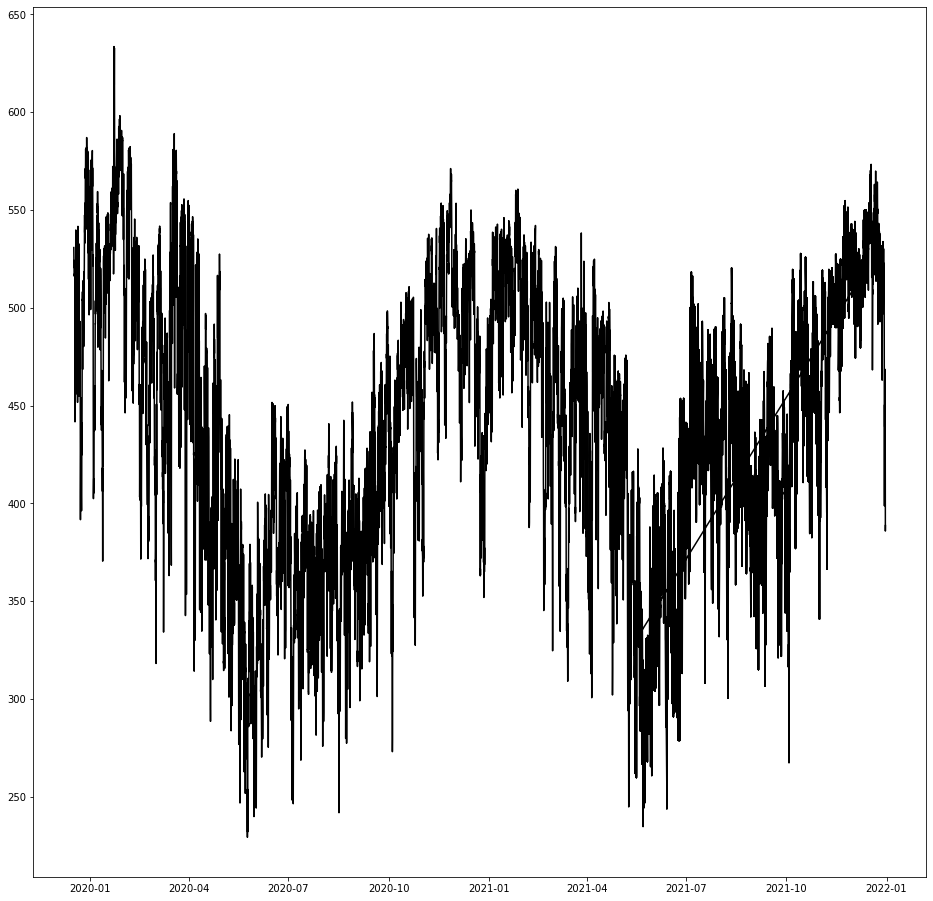

In [9]:
plt.figure(figsize=(16,16))
plt.plot(train_list[0].index, train_list[1]['carbon_per_MWh'], color='black')
plt.plot(test_list[0].index, test_list[1]['carbon_per_MWh'], color='red')
plt.plot(test_list[0].index, predictions[1], color='blue')